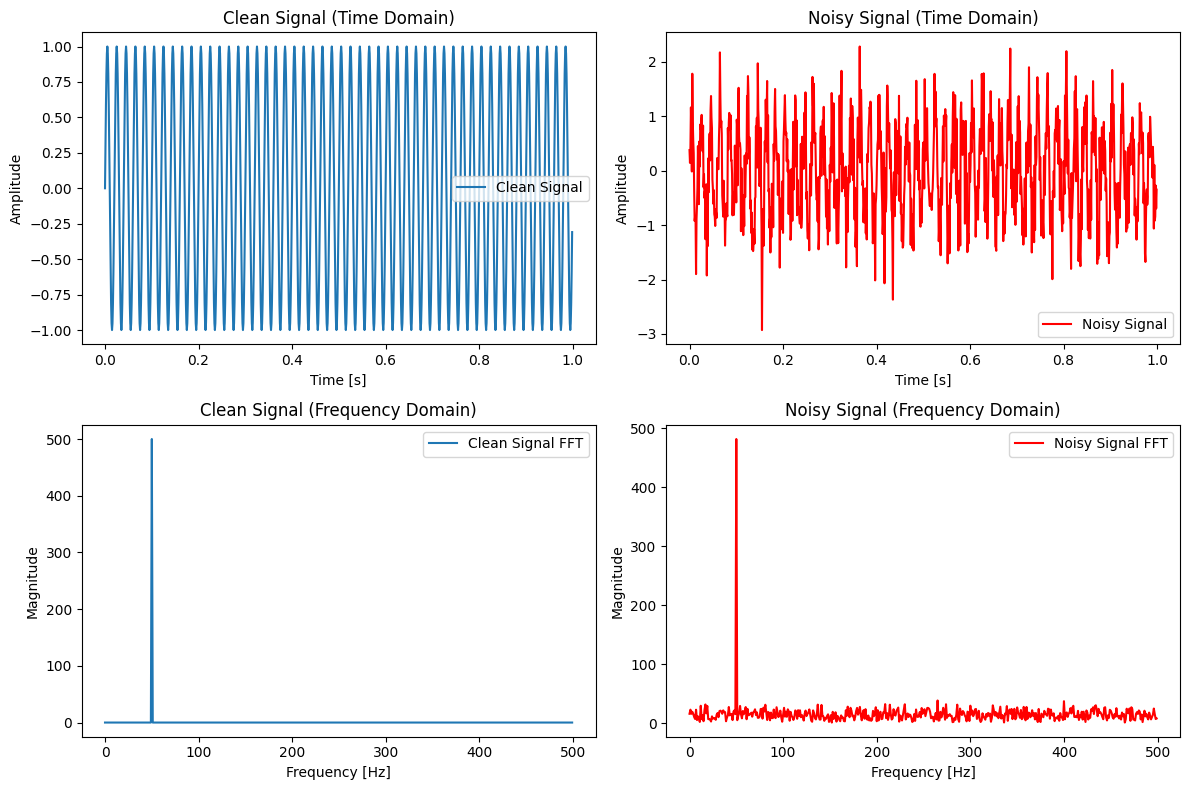

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Hz
duration = 1.0       # seconds
frequency = 50       # Hz (signal frequency)
noise_level = 0.5    # noise amplitude

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate clean signal (sine wave)
clean_signal = np.sin(2 * np.pi * frequency * t)

# Add random noise
noise = noise_level * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# Perform FFT
def compute_fft(signal):
    N = len(signal)
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(N, 1/sampling_rate)
    return fft_freq[:N//2], np.abs(fft_result)[:N//2]

# Compute FFTs
freqs, clean_fft = compute_fft(clean_signal)
_, noisy_fft = compute_fft(noisy_signal)

# Apply low-pass filter (simple thresholding)
threshold = 0  # Adjust this value based on your signal's frequency
filtered_fft = np.where(np.abs(freqs) < threshold, noisy_fft, 0)

# Inverse FFT to get denoised signal
denoised_signal = np.fft.ifft(filtered_fft)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time domain plots
axs[0, 0].plot(t, clean_signal, label='Clean Signal')
axs[0, 0].set_title('Clean Signal (Time Domain)')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].legend()

axs[0, 1].plot(t, noisy_signal, label='Noisy Signal', color='r')
axs[0, 1].set_title('Noisy Signal (Time Domain)')
axs[0, 1].set_xlabel('Time [s]')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].legend()

# Frequency domain plots
axs[1, 0].plot(freqs, clean_fft, label='Clean Signal FFT')
axs[1, 0].set_title('Clean Signal (Frequency Domain)')
axs[1, 0].set_xlabel('Frequency [Hz]')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].legend()

axs[1, 1].plot(freqs, noisy_fft, label='Noisy Signal FFT', color='r')
axs[1, 1].set_title('Noisy Signal (Frequency Domain)')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
